In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.neighbors import KNeighborsClassifier

## Reading and Cleaning the data

In [2]:
# read data file
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
# data cleaning
df.info()

df = df.drop(labels="Unnamed: 32", axis=1)
df = df.drop(labels="id", axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Feature visualization

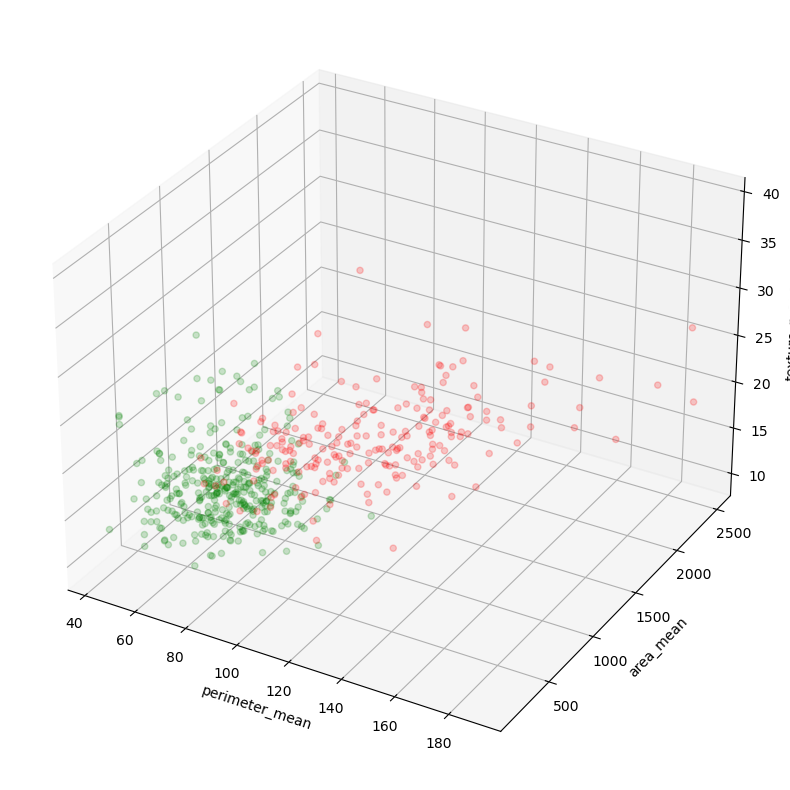

In [6]:
# plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

M = df[df.diagnosis == 1]
B = df[df.diagnosis == 0]

ax.scatter(M.perimeter_mean, M.area_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.2)
ax.scatter(B.perimeter_mean, B.area_mean, B.texture_mean, color = "green", label = "Benign", alpha = 0.2)

ax.set_xlabel("perimeter_mean")
ax.set_ylabel("area_mean")
ax.set_zlabel("texture_mean")

plt.show()

## Determining Optimal K values through For Loop Iteration for Various KNN Models.

(398, 30)
(398,)
(171, 30)
(171,)


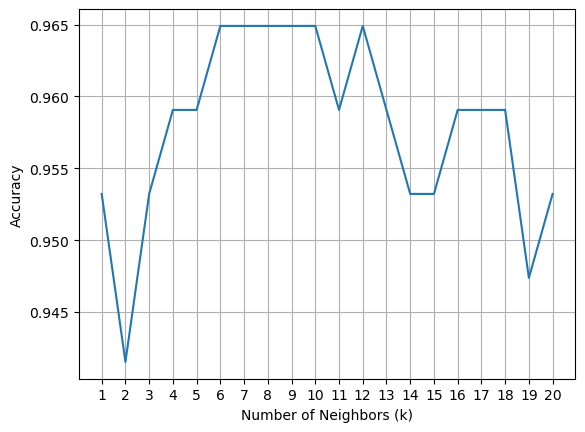

In [7]:
x = df.drop(["diagnosis"],axis = 1)
y = df['diagnosis']

scaler = MinMaxScaler()
scaler.fit(x)
x1 = scaler.transform(x) #normalize each column

x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.3,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

list_scores = []
# find the perfect k values
for k_value in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(x_train,y_train)
    list_scores.append(knn.score(x_test,y_test))

plt.plot(range(1,21),list_scores)
plt.xticks(range(1,21))
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## Identifying the Best K Values using Grid Search and 5-Fold Cross-Validation.

In [8]:
# Data modeling
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Check the shape of the training and testing data
x_train_scaled.shape, x_test_scaled.shape, y_train.shape, y_test.shape
print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(x_test.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(171, 30)
(171,)


In [9]:
# find best params using grid search
knn = KNeighborsClassifier(algorithm='auto')
knn.fit(x_train_scaled, y_train)

param_grid = {'n_neighbors': range(1,21)}
search_best_knn = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
search_best_knn.fit(x_train_scaled, y_train)
y_pred = search_best_knn.predict(x_train_scaled)

print("Best score:", search_best_knn.best_score_)
print("Best params:", search_best_knn.best_params_)
print("Accuracy with best params:", knn.score(x_test_scaled, y_test))

Best score: 0.9597784810126582
Best params: {'n_neighbors': 3}
Accuracy with best params: 0.9590643274853801


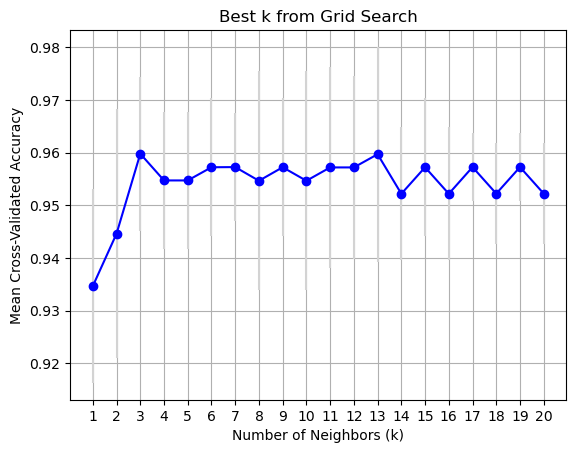

In [10]:
mean_scores = search_best_knn.cv_results_['mean_test_score']
std_scores = search_best_knn.cv_results_['std_test_score']
params = search_best_knn.cv_results_['param_n_neighbors']

# Convert params to integers
params = [int(param) for param in params]

plt.errorbar(params, mean_scores, yerr=std_scores, fmt='-o', color='blue', ecolor='lightgray')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Best k from Grid Search')
plt.xticks(range(1,21))
plt.grid(True)
plt.show()

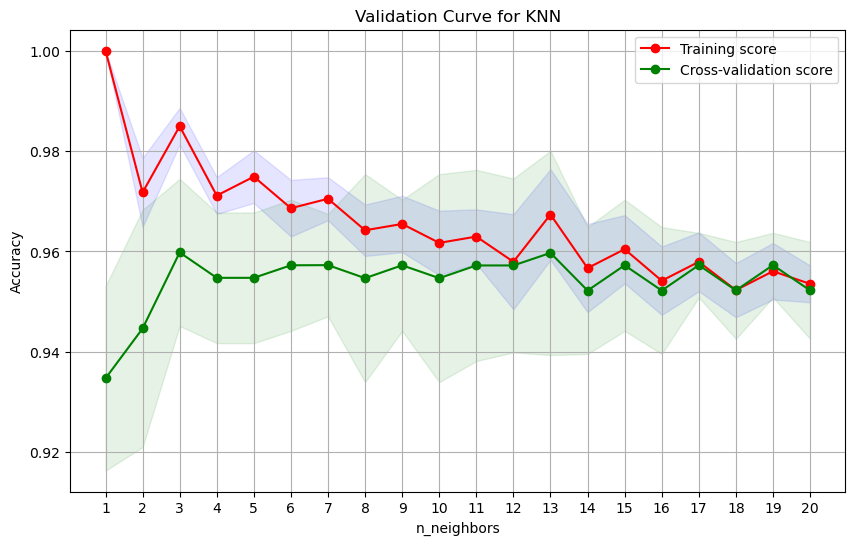

In [11]:
# range of n_neighbors
param_range = range(1, 21)

# validation curve computation of training and validation score
train_scores, valid_scores = validation_curve(estimator=knn, X=x_train_scaled, y=y_train, param_name='n_neighbors', param_range=param_range, cv=5)

# calculate training and validation score mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="red", marker='o')
plt.plot(param_range, valid_mean, label="Cross-validation score", color="green", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1, color="green")
plt.title("Validation Curve for KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.xticks(param_range)
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Classifcation Result

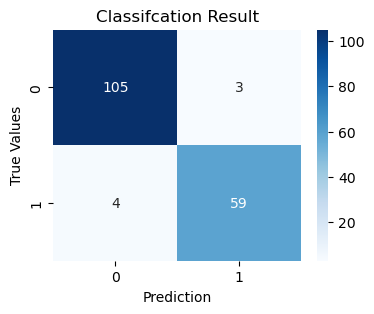


Result Evaluation
------------------------
Sum True Prediction: 164
Sum False Prediction: 7
------------------------
Accuracy Score: 0.9590643274853801 


In [12]:
prediction = knn.predict(x_test_scaled)

#seaborntable
cm = confusion_matrix(y_test, prediction.reshape(-1))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Classifcation Result')
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
incorrect_predictions = total_predictions - correct_predictions
plt.show()
#Result
print("\nResult Evaluation")
print("------------------------")
print("Sum True Prediction: {}".format(correct_predictions))
print("Sum False Prediction: {}".format(incorrect_predictions))
print("------------------------")
print("Accuracy Score: {} ".format(knn.score(x_test_scaled,y_test)))

In [13]:
# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled, y_train)

# Predicting on test set
y_pred_knn = knn.predict(x_test_scaled)
y_prob_knn = knn.predict_proba(x_test_scaled)[:, 1]

# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

accuracy_knn, precision_knn, recall_knn, roc_auc_knn

(0.9590643274853801,
 0.9516129032258065,
 0.9365079365079365,
 0.9763374485596708)

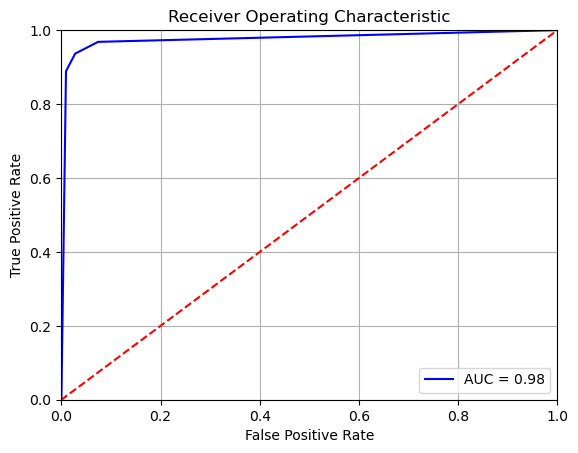

AUC: 0.9763374485596708


In [14]:
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(x_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#Plotting ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([-1, 1], [-1, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

print("AUC: {}".format(roc_auc))

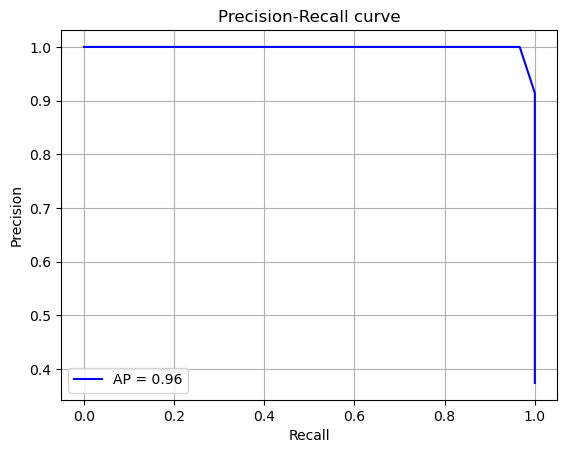

Average Presision Score: 0.9583704859780744


In [15]:
# Plotting PR curve
y_prob_train = knn.predict_proba(x_train_scaled)[:,1]
y_prob_test = knn.predict_proba(x_test_scaled)[:,1]

precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
prc_auc = average_precision_score(y_test, y_prob_test)

plt.title("Precision-Recall curve");
plt.plot(recall, precision, 'b', label = 'AP = %0.2f' % prc_auc)
plt.legend(loc = 'best')
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.grid(True)
plt.show()

print("Average Presision Score: {}".format(prc_auc))